### Title: 
#### Predict Costa Rican Household Poverty Level

### Group Members:
- Cheah Jun Yitt (WQD180107)
- Choong En Jun (WQD180113)
- Choo Jian Wei (WQD180124)
- Tan Yin Yen (WQD180108)

### Overview:
Many social programs have a hard time making sure the right people are given enough aid. It’s especially tricky when a program focuses on the poorest segment of the population. The world’s poorest typically can’t provide the necessary income and expense records to prove that they qualify.   
In Latin America, one popular method uses an algorithm to verify income qualification. It’s called the Proxy Means Test (or PMT). With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling, or the assets found in the home to classify them and predict their level of need.

<https://www.kaggle.com/c/costa-rican-household-poverty-prediction>

### Data:
<https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data>


### Table of Content
1) Package Installation 
2) Reading Data
3) Dealing with Outliers
4) Dealing with Missing Data


- Visualization
- Modelling
- Model Evaluation
- Conclusion

### Installation of lightgbm package

In [1]:
# !pip install lightgbm

C:\Users\jy\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


### Load python packages

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_columns = 150

#for machine learning
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
import lightgbm as lgb


### Read Data

In [3]:
train = pd.read_csv('../data/train.csv')
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [4]:
test = pd.read_csv('../data/test.csv')
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,0,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,16,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,1,2,0,1,1,1,2,3,3,3,17,NaN,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,.5,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,no,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.25,64.00,NaN,324


**Train data have 9557 entries, Test data have 23855 entries. Lets take a look at the statistic of the attributes.**

In [5]:
train.describe()
test.describe()


,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,1629.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.0,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.00000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,1.945066,0.399184,1.661714,2.060898,0.785079,3.220885,4.005964,3.999058,4.094590,7.200272,0.459791,3.999058,0.594015,0.077744,0.188030,0.008580,0.115622,0.013079,0.001465,0.001465,0.692791,0.222873,0.000942,0.001046,0.016428,0.065920,0.970074,0.017683,0.003139,0.002197,0.677409,0.964738,0.031705,0.003558,0.885110,0.000314,0.002197,0.110809,0.003872,0.213979,0.764257,0.015381,0.002511,0.001883,0.489589,0.458407,0.050120,0.882704,0.03003,0.084545,0.001465,0.0,0.001256,0.102438,0.327404,0.570158,0.128388,0.288061,0.583551,0.101078,0.252799,0.646123,0.057549,0.483415,0.516585,0.137805,0.123260,0.268390,0.031914,0.062781,0.033169,0.342681,0.311081,0.184054,0.381814,0.012138,0.009522,0.051167,0.010045,0.002407,0.013289,0.003139,0.012661,0.008685,1.406613,2.592445,0.284085,3.999058,9.231523,0.134666,0.170556,0.207701,0.185414,0.112692,0.017893,0.015591,0.139793,0.015381,2.739981,1.605380,0.61850,0.1

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,hogar_nin,hogar_adul,hogar_mayor,hogar_total,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,6.453000e+03,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,5730.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,4203.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
mean,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,1.563967,1.980508,0.389168,1.656522,2.045691,0.805709,3.220490,4.026199,4.021756,4.140426,7.214914,0.425172,4.021756,0.588741,0.077171,0.201375,0.008300,0.107017,0.014462,0.001677,0.001258,0.692740,0.234029,0.001761,0.000126,0.013456,0.057889,0.971538,0.018989,0.002138,0.001425,0.669559,0.962274,0.032487,0.005240,0.879527,0.000503,0.003856,0.114940,0.003647,0.225394,0.753060,0.016055,0.001844,0.002222,0.476861,0.476903,0.044014,0.875419,0.034708,0.086058,0.001677,0.000168,0.001970,0.111460,0.322938,0.565602,0.127222,0.307596,0.565183,0.102490,0.270540,0.62697,0.056757,0.490401,0.509599,0.137827,0.123198,0.273265,0.035924,0.058811,0.033409,0.337567,0.307428,0.187500,0.384809,0.013665,0.008426,0.049212,0.009809,0.003228,0.012617,0.002767,0.012701,0.007839,1.412559,2.609197,0.295146,4.0

## Dealing with Outliers
**If we look carefully, There is an outlier for attribute rez_esc in test data.**

In [6]:
print(test.loc[:,"rez_esc"].describe())
test.loc[test.loc[:,"rez_esc"]==99,"rez_esc"]

count    4203.000000
mean        0.425172
std         1.767765
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        99.000000
Name: rez_esc, dtype: float64


3512    99.0
Name: rez_esc, dtype: float64

We can see that there is only one outlier =99, the rest of the test data is okay.  
According to answer from kaggle competition host, the value can be safely changed to 5.  
<https://www.kaggle.com/c/costa-rican-household-poverty-prediction/discussion/61403>

In [7]:
test.loc[test.loc[:,"rez_esc"]==99,"rez_esc"]=5
test.loc[:,"rez_esc"].describe()

count    4203.000000
mean        0.402808
std         0.903882
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: rez_esc, dtype: float64

## Dealing with Missing Data
**Now we will deal with missing values in both test and train dataset.**  
- We will first check for missing values in the columns

In [8]:
train_na= pd.DataFrame((train.isnull().sum().values),index=train.columns, columns=['isNA']).sort_values(by=['isNA'],ascending=False)
if train_na.loc[train_na.loc[:,'isNA']>0,:].shape[0]>1 :
    train_na.loc[train_na.loc[:,'isNA']> 0,]
else:
    print('no NA in train set')

test_na= pd.DataFrame((test.isnull().sum().values),index=test.columns, columns=['isNA']).sort_values(by=['isNA'],ascending=False)
if train_na.loc[train_na.loc[:,'isNA']>0,:].shape[0]>1 :
    test_na.loc[test_na.loc[:,'isNA']> 0,]
else:
    print('no NA in test set')

,isNA
rez_esc,7928
v18q1,7342
v2a1,6860
SQBmeaned,5
meaneduc,5


,isNA
rez_esc,19653
v18q1,18126
v2a1,17403
meaneduc,31
SQBmeaned,31


**We can see the missing values are largely from:**

- ***rez_esc: years behind in school:***

- ***v18q1: number of tablets household owns***

- ***v2a1: monthly rent payment***

- ***meaneduc: average years of education for adults***

- ***SQBmeaned is the square of meaneduc***


For the variable ***rez_esc (years behind in school)***,  
data is only available if the age of individual is between 7 to 17 years old.  
We will set 0 to all other null values.

(array([140., 136., 140., 137., 133., 139., 154., 142., 153., 355.]),
 array([ 7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.]),
 <a list of 10 Patch objects>)

(([<matplotlib.axis.XTick at 0x236b139f400>,
  <a list of 11 Text xticklabel objects>),)

Text(0,0.5,'frequence of rez_esc')

Text(0.5,0,'Age')

Text(0.5,1,'Non-null rez_esc Frequency according to age')

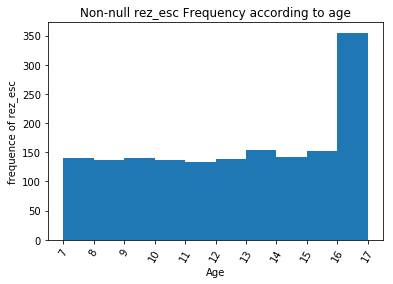

In [9]:
rez_esc_age=train.loc[train['rez_esc'].isnull()==False, 'age']

plt.hist(x=rez_esc_age,)
plt.xticks(np.arange(min(rez_esc_age), max(rez_esc_age)+1, 1.0),rotation = 60),
plt.ylabel('frequence of rez_esc')
plt.xlabel('Age')
plt.title('Non-null rez_esc Frequency according to age')
plt.show()

***v2a1: monthly rent payment***
    
-    this depends on tipovivi2 and tipovivi3, v2a1 is NA if tipovivi2 or tipovivi3 is 0
    tipovivi2 (a true false statement if an individual owns the house and is paying installment). 
    tipovivi3 (a true false statement if an individual is renting the house). 
    We will assume 0 for NA in v2a1

<BarContainer object of 5 artists>

(([<matplotlib.axis.XTick at 0x236b16594e0>,
  <a list of 5 Text xticklabel objects>),)

Text(0,0.5,'Frequency')

Text(0.5,1,"Missing Rental 'v2a1' according to Home Ownership Status")

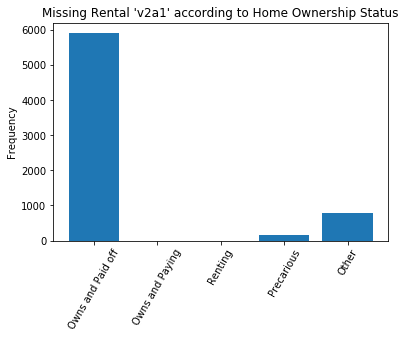

In [10]:
tipos=[x for x in train if x.startswith('tipo')]
rentNA_status=train.loc[train['v2a1'].isnull(), tipos].sum()
plt.bar(tipos,rentNA_status,align='center')
plt.xticks([0,1,2,3,4],['Owns and Paid off','Owns and Paying', 'Renting','Precarious','Other'],rotation = 60),
plt.ylabel('Frequency')
plt.title("Missing Rental 'v2a1' according to Home Ownership Status")

***v18q1: number of tablets household owns***

  -  This depends on v18q (a true false statement if an individual own a tablet). v18q1 is NA if v18q is 0
    We will assume 0 for NA in v18q1

(array([   0.,    0.,    0.,    0.,    0., 7342.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

(([<matplotlib.axis.XTick at 0x236b16b0d30>,
  <a list of 2 Text xticklabel objects>),)

Text(0,0.5,'Frequency missing value on v18q1')

Text(0.5,0,'Individual Tablet Ownership (v18q)')

Text(0.5,1,'Missing value on household tablet ownership vs individual tablet ownership')

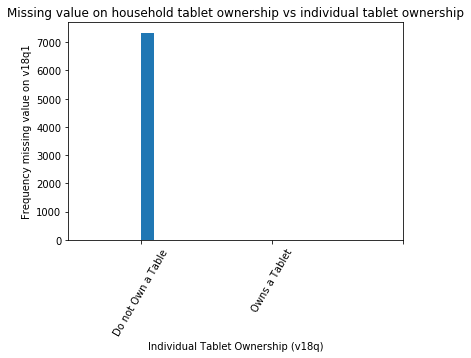

In [11]:
Tablet_status=train.loc[train['v18q1'].isnull(), 'v18q']
plt.hist(x=Tablet_status)
plt.xticks([0,1,2],['Do not Own a Table','Owns a Tablet'],rotation=60),
plt.ylabel('Frequency missing value on v18q1')
plt.xlabel('Individual Tablet Ownership (v18q)')
plt.title('Missing value on household tablet ownership vs individual tablet ownership')

***meaneduc: average years of education for adults***
  -  We will replace this with mode
    
***SQBmeaned is the square of meaneduc***
  - replace with square of replaced meaneduc

In [12]:
train["meaneduc"].isna().any()

True

<Figure size 720x360 with 0 Axes>

C:\Users\jy\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial)
C:\Users\jy\Anaconda3\lib\site-packages\numpy\core\_methods.py:28: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial)


meaneduc contains NA.


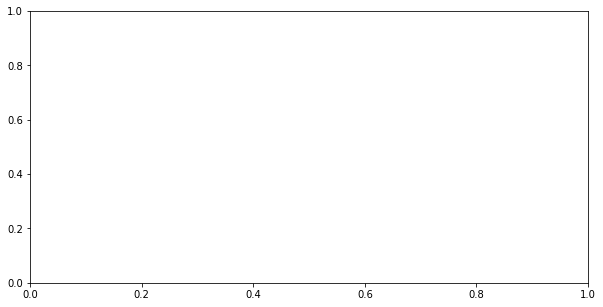

In [13]:
try: 
    plt.figure(figsize=(10,5))
    plt.hist(x=train['meaneduc'],bins=int(train['meaneduc'].max()))
    plt.xticks(np.arange(min(train['meaneduc']), max(train['meaneduc'])),rotation=60),
    plt.ylabel('Frequency')
    plt.xlabel('average years of education for adults (18+)')
    plt.title('Histogram for meaneduc')
    plt.show()
    
except:
    print("meaneduc contains NA.")


# Impute Missing Values
1. Impute ***meaneduc*** with mode (mode = 6)
2. Impute ***SQBmeaned*** with squared of mode of ***meaneduc*** (mode = 36)
3. Impute ***rez_esc***, ***v18q1*** and ***v2a1*** with 0 

In [14]:
train.loc[:,"meaneduc"].mode()
#train: mode for meaneduc is 6 replace NA with 6, replace SQBmeaned NA to 36
train.loc[train.loc[:,"meaneduc"].isnull()==True,"meaneduc"] = 6
train.loc[train.loc[:,"SQBmeaned"].isnull()==True,"SQBmeaned"] = 36

test.loc[:,"meaneduc"].mode()
#test: mode for meaneduc is 6 replace NA with 6, replace SQBmeaned NA to 36
test.loc[test.loc[:,"meaneduc"].isnull()==True,"meaneduc"] = 6
test.loc[test.loc[:,"SQBmeaned"].isnull()==True,"SQBmeaned"] = 36


#Replace all NA values for remaining 3 attributes with 0no
train.loc[train.loc[:,"rez_esc"].isnull()==True,"rez_esc"] = 0
train.loc[train.loc[:,"v18q1"].isnull()==True,"v18q1"] = 0
train.loc[train.loc[:,"v2a1"].isnull()==True,"v2a1"] = 0

test.loc[test.loc[:,"rez_esc"].isnull()==True,"rez_esc"] = 0
test.loc[test.loc[:,"v18q1"].isnull()==True,"v18q1"] = 0
test.loc[test.loc[:,"v2a1"].isnull()==True,"v2a1"] = 0


0    6.0
dtype: float64

0    6.0
dtype: float64

## Check for Missing Values

In [15]:
#Check for missing values again:
train_na= pd.DataFrame((train.isnull().sum().values),index=train.columns, columns=['isNA']).sort_values(by=['isNA'],ascending=False)
if train_na.loc[train_na.loc[:,'isNA']>0,:].shape[0]>1 :
    train_na.loc[train_na.loc[:,'isNA']> 0,]

else:
    print('No NA in train set')

test_na= pd.DataFrame((test.isnull().sum().values),index=test.columns, columns=['isNA']).sort_values(by=['isNA'],ascending=False)
if train_na.loc[train_na.loc[:,'isNA']>0,:].shape[0]>1 :
    test_na.loc[test_na.loc[:,'isNA']> 0,]
else:
    print('No NA in test set')

No NA in train set
No NA in test set


### Investigate if all individuals in the household have the same poverty target

In [16]:
target_Discrepancy=(train.groupby('idhogar')['Target'].nunique()>1)
num_unique_households = train["idhogar"].unique().shape[0]
print('There are',target_Discrepancy.sum(),'households with contradicting targets, out of', num_unique_households, 'households in the train dataset.')

There are 85 households with contradicting targets, out of 2988 households in the train dataset.


**Lets see the data for 85 households that have discrepancy in target poverty level**

In [17]:
Discrepancy_Index=(train.groupby('idhogar')['Target'].transform('nunique')>1)
HHID_Discrepancy=train.loc[Discrepancy_Index,'idhogar'].unique()
#household with contradicting target
train.loc[train['idhogar'].isin(HHID_Discrepancy),['idhogar','parentesco1','Target']].head()

,idhogar,parentesco1,Target
282,4b6077882,1,1
283,4b6077882,0,2
284,4b6077882,0,2
285,6833ac5dc,0,2
286,6833ac5dc,0,2


**Judging from the data, the household head target might not be necessary true. Although prediction scoring is based on household head target, we should be able to safely replace the household target using the mode target of the household.**


In [18]:

for HH in HHID_Discrepancy:
    Targets= (train.loc[train['idhogar']==HH,'Target'])

    if Targets.mode().shape[0] >1:
        for i in Targets.index:
            if train.loc[i,'parentesco1']==1:
                HeadTarget= train.loc[i,"Target"]    
        for i in Targets.index:
            train.loc[i,'Target']=HeadTarget
    elif Targets.mode().shape[0]==1:
        for i in Targets.index:
            TrueTarget=int(Targets.mode())
            train.loc[i,'Target']=TrueTarget
        


**Check for household targets discrepancy again for confirmation**

In [19]:
target_Discrepancy=(train.groupby('idhogar')['Target'].nunique()>1)

print('There are ',target_Discrepancy.sum(),'households with contradicting targets, out of 2988 households in the train dataset')

train.head()
train.shape

There are  0 households with contradicting targets, out of 2988 households in the train dataset


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


(9557, 143)

**Remove (SQBescolari, SQBage, SQBHogar_ttal,SQBedjefe, SQBhogar_nin,SQBovercrowding, SQBdependency, SQBMeaned, agesq)**  
There are 9 columns where the attributes are the squared of other attributes. We do not need those in our model as the model are smart enough to detect non-linear relationship.



In [20]:
train=train.drop(columns=train.columns[133:142],axis=1)
test=test.drop(columns=test.columns[133:142],axis=1)

In [21]:
print(train.shape)
print(test.shape)

(9557, 134)
(23856, 133)


# Visualization

## Boxplot

**Normalize int and float type columns for boxplot**

In [22]:
min_max_scaler=preprocessing.MinMaxScaler()
trainNorm= train.select_dtypes(include=['int64', 'float64'])
trainNorm=pd.DataFrame(min_max_scaler.fit_transform(trainNorm))
trainNorm.columns=train.select_dtypes(include=['int64', 'float64']).columns
print(trainNorm.shape)

testNorm= test.select_dtypes(include=['int64', 'float64'])
testNorm=pd.DataFrame(min_max_scaler.fit_transform(testNorm))
testNorm.columns=test.select_dtypes(include=['int64', 'float64']).columns

(9557, 129)


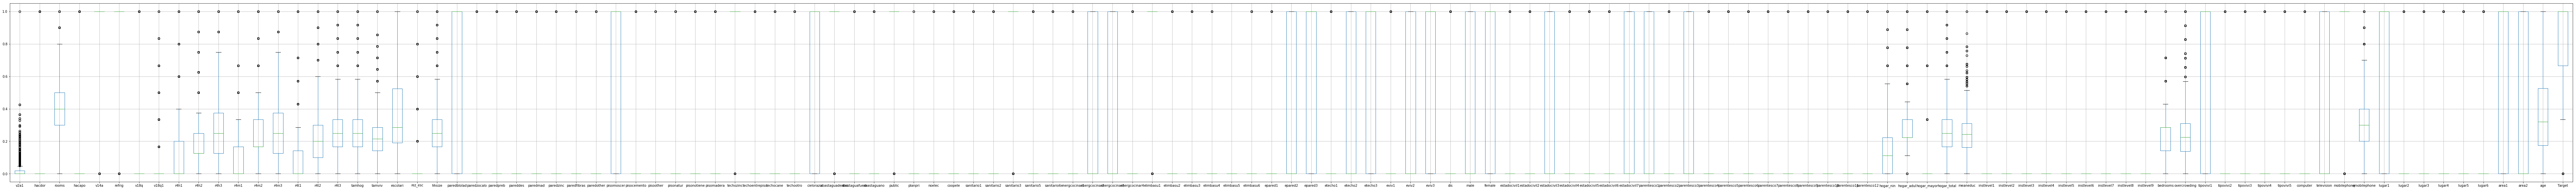

In [23]:
train_boxplot = trainNorm.boxplot(figsize=(140,10))
#Click on figure to expand

In [24]:
## need more visualizations - to inspire feature engineering


# Feature Engineering

**Since prediction is scored only for the household head. We need to make new features that is household level and not individual.**  
**Besides, we have created a new scoring system for education level (*instlevel*), by giving higher score to individual that has completed tertiary education.**

In [96]:
#Setting new features for household specific in train data

#Number of Adults not including seniors >65
train['Adults']=train['hogar_adul']-train['hogar_mayor']
#Number of children < 19yo and seniors>65
train['Dependents']=train['hogar_nin']+train['hogar_mayor']
#Number of teenager from 12 to 19
train['Teenagers']=train['hogar_nin']-train['r4t1']
#Dependency is number of dependents per adults. This replaces the original dependency data from dataset.
train['dependency']=train['Dependents']/train['Adults']
#Percentage of Adults in household
train['P_Adults']=train['Adults']/train['hogar_total']
#Percentage of Male Adults in household
train['P_Adults_Male']=train['r4h3']/train['hogar_total']
#Percentage Female Adults in household
train['P_Adults_Female']=train['r4m3']/train['hogar_total']
#Percentage Children <19yo in household
train['P_Children']=train['hogar_nin']/train['hogar_total']
#Percentage of Seniors in household
train['P_Seniors']=train['hogar_mayor']/train['hogar_total']
#Percentage of Teenagers in household
train['P_Teenagers']=train['Teenagers']/train['hogar_total']
#Rent per person in household)
train['RentHH']=train['v2a1']/train['hogar_total']
#Rent per Adult in household
train['RentAdults'] = train['v2a1']/train['Adults']
train['RentAdults'] = train['RentAdults'].fillna(train['v2a1']) # Replace NA value with the Rent value itself (Assume Adults = 0 as Adults = 1, there has to be 1 adult to pay the Rent amount.)

#Tablet per person in household
train['Tablet_PP']=train['v18q1']/train['hogar_total']
#Mobile Phone per person in household
train['Phone_PP']=train['qmobilephone']/train['hogar_total']
#Bedroom per person in household
train['Bedroom_PP']=train['bedrooms']/train['hogar_total']
#Appliance scoring. Higher the better
train['Appliances']=train['refrig']+train['computer']+train['television']
#Household size Difference
train['HHS_Diff']=train['tamviv']-train['hhsize']


#New Scoring For Education Level
train["EduLevel"] = 0 
train.loc[train["instlevel9"] == 1,"EduLevel"] = 6
train.loc[train["instlevel8"] == 1,"EduLevel"] = 5 #higher scoring for completing tertiary education
train.loc[train["instlevel7"] == 1,"EduLevel"] = 3
train.loc[train["instlevel5"] == 1,"EduLevel"] = 2
train.loc[(train[["instlevel4","instlevel3","instlevel6"]].sum(axis = 1) > 0),"EduLevel"] = 1

train.head()

#Sufficiency Features (self-defined conditions for a sufficient living conditions)
# Very good conditions:
train["GoodCondition"] = train["paredblolad"] + train["pisomoscer"] + ((train["techozinc"] + train["techoentrepiso"]) > 0)*1 + train["abastaguadentro"] + train["public"] + ((train["sanitario3"] + train["sanitario5"]) > 0)*1 + ((train["energcocinar2"] + train["energcocinar3"]) > 0)*1 + train["elimbasu1"] + train["epared3"] + train["etecho3"] + train["eviv3"]
train["GoodCondition"] = train["GoodCondition"]/11   # Take the mean to get a GoodCondition score between 0 and 1                                                 

# train["AverageCondition"] = ((train["paredzocalo"] + train["paredpreb"] + train["paredzinc"]) > 0)*1 + 
# train["pisocemento"] + 
# train["techocane"] + 
# train["abastaguafuera"] + 
# ((train["planpri"] + train["sanitario5"]) > 0)*1 + 

# ((train["sanitario3"] + train["sanitario5"]) > 0)*1 + 
# ((train["energcocinar2"] + train["energcocinar3"]) > 0)*1 + 
# train["elimbasu1"] + 
# train["epared3"] + train["etecho3"] + train["eviv3"]

# train["GoodCondition"] = train["GoodCondition"]/11 


#We replicate the same for test data since we need the same features for prediction

test['Adults']=test['hogar_adul']-test['hogar_mayor']
test['Dependents']=test['hogar_nin']+test['hogar_mayor']
test['Teenagers']=test['hogar_nin']-test['r4t1']
test['dependency']=test['Dependents']/test['Adults']
test['P_Adults']=test['Adults']/test['hogar_total']
test['P_Adults_Male']=test['r4h3']/test['hogar_total']
test['P_Adults_Female']=test['r4m3']/test['hogar_total']
test['P_Children']=test['hogar_nin']/test['hogar_total']
test['P_Seniors']=test['hogar_mayor']/test['hogar_total']
test['P_Adultish']=test['Teenagers']/test['hogar_total']
test['RentHH']=test['v2a1']/test['hogar_total']

test['RentAdults']=test['v2a1']/test['Adults']
test['RentAdults'] = test['RentAdults'].fillna(test['v2a1']) # Replace NA value with the Rent value itself (Assume Adults = 0 as Adults = 1, there has to be 1 adult to pay the Rent amount.)

test['Tablet_PP']=test['v18q1']/test['hogar_total']
test['Phone_PP']=test['qmobilephone']/test['hogar_total']
test['Bedroom_PP']=test['bedrooms']/test['hogar_total']
test['Appliances']=test['refrig']+test['computer']+test['television']
test['HHS_Diff']=test['tamviv']-test['hhsize']

#New Scoring For Education Level
test["EduLevel"] = 0 
test.loc[test["instlevel9"] == 1,"EduLevel"] = 6
test.loc[test["instlevel8"] == 1,"EduLevel"] = 5 #higher scoring for completing tertiary education
test.loc[test["instlevel7"] == 1,"EduLevel"] = 3
test.loc[test["instlevel5"] == 1,"EduLevel"] = 2
test.loc[(test[["instlevel4","instlevel3","instlevel6"]].sum(axis = 1) > 0),"EduLevel"] = 1

# Living Conditions
test["GoodCondition"] = test["paredblolad"] + test["pisomoscer"] + ((test["techozinc"] + test["techoentrepiso"]) > 0)*1 + test["abastaguadentro"] + test["public"] + ((test["sanitario3"] + test["sanitario5"]) > 0)*1 + ((test["energcocinar2"] + test["energcocinar3"]) > 0)*1 + test["elimbasu1"] + test["epared3"] + test["etecho3"] + test["eviv3"]
test["GoodCondition"] = test["GoodCondition"]/11   # Take the mean to get a GoodCondition score between 0 and 1                                                 

test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,...,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Target,Adults,Dependents,Teenagers,P_Adults,P_Adults_Male,P_Adults_Female,P_Children,P_Seniors,P_Teenagers,RentHH,RentAdults,Tablet_PP,Phone_PP,Bedroom_PP,Appliances,HHS_Diff,EduLevel,GoodCondition
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,0.000000,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,4,1,0,0,1.0,1.0,0.0,0.0,0.0,0.00,190000.0,1.900000e+05,0.00,1.00,1.00,1,0,1,0.636364
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,inf,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,4,0,1,0,0.0,1.0,0.0,0.0,1.0,0.00,135000.0,inf,1.00,1.00,1.00,1,0,5,0.454545
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,inf,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,4,0,1,0,0.0,0.0,1.0,0.0,1.0,0.00,0.0,0.000000e+00,0.00,0.00,2.00,1,0,2,0.727273
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.000000,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,4,2,2,1,0.5,0.5,0.5,0.5,0.0,0.25,45000.0,9.000000e+04,0.25,0.75,0.75,1,0,1,0.909091
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,1.000000,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,4,2,2,1,0.5,0.5,0.5,0.5,0.0,0.25,45000.0,9.000000e+04,0.25,0.75,0.75,1,0,2,0.909091


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,...,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,Adults,Dependents,Teenagers,P_Adults,P_Adults_Male,P_Adults_Female,P_Children,P_Seniors,P_Adultish,RentHH,RentAdults,Tablet_PP,Phone_PP,Bedroom_PP,Appliances,HHS_Diff,EduLevel,GoodCondition
0,ID_2f6873615,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,0.500000,no,17,16.5,1,0,0,0,0,0,0,0,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,4,2,1,0,0.666667,0.666667,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.0,0.666667,0.666667,2,0,0,0.909091
1,ID_1c78846d2,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,16,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,0.500000,no,17,16.5,0,0,0,0,0,0,0,1,0,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,2,1,0,0.666667,0.666667,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.0,0.666667,0.666667,2,0,5,0.909091
2,ID_e5442cf6a,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,17,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,72958b30c,1,2,0,3,0.500000,no,17,16.5,0,0,0,0,0,0,0,0,1,2,1.5,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,41,2,1,0,0.666667,0.666667,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.0,0.666667,0.666667,2,0,6,0.909091
3,ID_a8db26a79,0.0,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5b598fbc9,0,1,0,1,0.000000,16,no,16.0,0,0,0,0,0,0,0,1,0,1,1.0,1,0,0,0,0,1,0,1,2,1,0,0,0,0,0,1,0,59,1,0,0,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0,2.000000,1.000000,2,0,5,0.909091
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,inf,no,11,6.0,0,0,0,0,1,0,0,0,0,2,0.5,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,0,1,1,0.000000,0.000000,1.000000,1.000000,0.0,1.0,175000.0,inf,1.0,1.000000,2.000000,1,0,2,0.818182


## Aggregate Features at the Household Level
**Now we want to aggregate existing features to be representable at the household level.**   
1. We aggregate variables in 'List_Mean' by taking the mean across all individuals in their respective household.
2. We aggregate variables in 'List_Summary' by taking the mean, standard deviation, min, max, and sum across all individuals in their respective household.
3. We added 'age_range' and 'escolari_range', which calculates the range of age and years of schooling across all individuals in their respective household.


In [97]:
List_Mean = ['rez_esc', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 'estadocivil4', 'estadocivil5',
             'estadocivil6', 'estadocivil7', 'parentesco2','parentesco3', 'parentesco4', 'parentesco5', 'parentesco6', 'parentesco7',
             'parentesco8', 'parentesco9', 'parentesco10', 'parentesco11', 'parentesco12','instlevel1', 'instlevel2', 'instlevel3',
             'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9','overcrowding']

List_Summary = ['age', 'escolari','dis','EduLevel']

trainGP = pd.DataFrame()
testGP = pd.DataFrame()

for item in List_Mean:
    group_train_mean = train[item].groupby(train['idhogar']).mean()
    group_test_mean = test[item].groupby(test['idhogar']).mean()
    new_col = item + '_mean'
    trainGP[new_col] = group_train_mean
    testGP[new_col] = group_test_mean

for item in List_Summary:
    for function in ['mean','std','min','max','sum']:
        group_train = train[item].groupby(train['idhogar']).agg(function)
        group_test = test[item].groupby(test['idhogar']).agg(function)
        new_col = item + '_' + function
        trainGP[new_col] = group_train
        testGP[new_col] = group_test
        
#adding one final feature
trainGP['age_extreme']=trainGP['age_max']-trainGP['age_min']
testGP['age_extreme']=testGP['age_max']-testGP['age_min']
trainGP['escolari_extreme']=trainGP['escolari_max']-trainGP['escolari_min']
testGP['escolari_extreme']=testGP['escolari_max']-testGP['escolari_min']

# Impute 0 to std columns (taking standard deviation on 1 value will yield NA)
trainGP["age_std"] = trainGP["age_std"].fillna(0)
trainGP["escolari_std"] = trainGP["escolari_std"].fillna(0)
trainGP["dis_std"] = trainGP["dis_std"].fillna(0)
trainGP["EduLevel_std"] = trainGP["EduLevel_std"].fillna(0)

testGP["age_std"] = testGP["age_std"].fillna(0)
testGP["escolari_std"] = testGP["escolari_std"].fillna(0)
testGP["dis_std"] = testGP["dis_std"].fillna(0)
testGP["EduLevel_std"] = testGP["EduLevel_std"].fillna(0)
    
trainGP.head()
testGP.head()

,rez_esc_mean,male_mean,female_mean,estadocivil1_mean,estadocivil2_mean,estadocivil3_mean,estadocivil4_mean,estadocivil5_mean,estadocivil6_mean,estadocivil7_mean,parentesco2_mean,parentesco3_mean,parentesco4_mean,parentesco5_mean,parentesco6_mean,parentesco7_mean,parentesco8_mean,parentesco9_mean,parentesco10_mean,parentesco11_mean,parentesco12_mean,instlevel1_mean,instlevel2_mean,instlevel3_mean,instlevel4_mean,instlevel5_mean,instlevel6_mean,instlevel7_mean,instlevel8_mean,instlevel9_mean,overcrowding_mean,age_mean,age_std,age_min,age_max,age_sum,escolari_mean,escolari_std,escolari_min,escolari_max,escolari_sum,dis_mean,dis_std,dis_min,dis_max,dis_sum,EduLevel_mean,EduLevel_std,EduLevel_min,EduLevel_max,EduLevel_sum,age_extreme,escolari_extreme
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
001ff74ca,0.0,0.000000,1.000000,0.500000,0.0,0.0,0.0,0.500000,0.0,0.000000,0.00,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.00,0.000000,0.0,0.0,0.0,0.5,0.0,0.500000,19.000000,26.870058,0,38,38,8.000000,11.313708,0,16,16,0.0,0.0,0,0,0,2.500000,3.535534,0,5,5,38,16
003123ec2,0.0,0.750000,0.250000,0.500000,0.5,0.0,0.0,0.000000,0.0,0.000000,0.25,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.25,0.250000,0.0,0.0,0.0,0.0,0.0,2.000000,12.750000,12.446552,1,24,51,3.250000,3.774917,0,7,13,0.0,0.0,0,0,0,0.500000,0.577350,0,1,2,23,7
004616164,0.0,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.5,0.500000,0.00,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.00,0.000000,0.5,0.0,0.0,0.0,0.0,0.666667,33.000000,24.041631,16,50,66,7.000000,5.656854,3,11,14,0.0,0.0,0,0,0,1.000000,1.414214,0,2,2,34,8
004983866,1.0,0.500000,0.500000,0.000000,0.0,0.0,0.0,0.000000,0.5,0.500000,0.00,0.000000,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,37.500000,30.405592,16,59,75,7.500000,0.707107,7,8,15,0.0,0.0,0,0,0,1.000000,0.000000,1,1,2,43,1
005905417,0.0,0.666667,0.333333,0.333333,0.0,0.0,0.0,0.333333,0.0,0.333333,0.00,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.00,0.666667,0.0,0.0,0.0,0.0,0.0,0.500000,17.333333,13.316656,6,32,52,5.666667,4.932883,0,9,17,0.0,0.0,0,0,0,0.666667,0.577350,0,1,2,26,9


,rez_esc_mean,male_mean,female_mean,estadocivil1_mean,estadocivil2_mean,estadocivil3_mean,estadocivil4_mean,estadocivil5_mean,estadocivil6_mean,estadocivil7_mean,parentesco2_mean,parentesco3_mean,parentesco4_mean,parentesco5_mean,parentesco6_mean,parentesco7_mean,parentesco8_mean,parentesco9_mean,parentesco10_mean,parentesco11_mean,parentesco12_mean,instlevel1_mean,instlevel2_mean,instlevel3_mean,instlevel4_mean,instlevel5_mean,instlevel6_mean,instlevel7_mean,instlevel8_mean,instlevel9_mean,overcrowding_mean,age_mean,age_std,age_min,age_max,age_sum,escolari_mean,escolari_std,escolari_min,escolari_max,escolari_sum,dis_mean,dis_std,dis_min,dis_max,dis_sum,EduLevel_mean,EduLevel_std,EduLevel_min,EduLevel_max,EduLevel_sum,age_extreme,escolari_extreme
idhogar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000a08204,0.00,0.666667,0.333333,0.333333,0.666667,0.0,0.0,0.0,0.0,0.00,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.333333,0.00,0.00,0.00,0.00,0.0,0.0,0.666667,0.0,1.500000,20.666667,14.468356,4,30,62,8.666667,7.571878,0,14,26,0.00,0.000000,0,0,0,3.333333,2.886751,0,5,10,26,14
000bce7c4,0.00,0.500000,0.500000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.00,0.500000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.500000,0.50,0.00,0.00,0.00,0.0,0.0,0.000000,0.0,1.000000,61.500000,2.121320,60,63,123,2.500000,3.535534,0,5,5,0.50,0.707107,0,1,1,0.000000,0.000000,0,0,0,3,5
001845fb0,0.00,0.500000,0.500000,0.000000,0.500000,0.0,0.0,0.0,0.0,0.50,0.250000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.00,0.25,0.25,0.25,0.0,0.0,0.250000,0.0,1.333333,35.500000,16.421531,19,52,142,10.250000,3.304038,6,14,41,0.00,0.000000,0,0,0,2.250000,1.892969,1,5,9,33,8
003514e22,0.25,0.750000,0.250000,0.250000,0.000000,0.5,0.0,0.0,0.0,0.25,0.250000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.250000,0.00,0.25,0.25,0.00,0.0,0.0,0.250000,0.0,1.333333,24.000000,15.253415,6,39,96,7.250000,5.852350,0,14,29,0.00,0.000000,0,0,0,1.750000,2.217356,0,5,7,33,14
003b51a87,0.50,0.750000,0.250000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.00,0.000000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.000000,0.75,0.25,0.00,0.00,0.0,0.0,0.000000,0.0,2.000000,28.750000,23.128266,11,61,115,4.000000,1.825742,2,6,16,0.25,0.500000,0,1,1,0.250000,0.500000,0,1,1,50,4


**Now we merge the aggregated features, all existing features and added features for the head of household.**



In [98]:
trainGP = trainGP.reset_index()
testGP = testGP.reset_index()

trainML = pd.merge(train, trainGP, on='idhogar')
testML = pd.merge(test, testGP, on='idhogar')

#fill all na as 0
# trainML.fillna(value=0, inplace=True)
# testML.fillna(value=0, inplace=True)

trainML.head()
testML.head()


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,...,area1,area2,age,Target,Adults,Dependents,Teenagers,P_Adults,P_Adults_Male,P_Adults_Female,P_Children,P_Seniors,P_Teenagers,RentHH,RentAdults,Tablet_PP,Phone_PP,Bedroom_PP,Appliances,HHS_Diff,EduLevel,GoodCondition,rez_esc_mean,male_mean,female_mean,estadocivil1_mean,estadocivil2_mean,estadocivil3_mean,estadocivil4_mean,estadocivil5_mean,estadocivil6_mean,estadocivil7_mean,parentesco2_mean,parentesco3_mean,parentesco4_mean,parentesco5_mean,parentesco6_mean,parentesco7_mean,parentesco8_mean,parentesco9_mean,parentesco10_mean,parentesco11_mean,parentesco12_mean,instlevel1_mean,instlevel2_mean,instlevel3_mean,instlevel4_mean,instlevel5_mean,instlevel6_mean,instlevel7_mean,instlevel8_mean,instlevel9_mean,overcrowding_mean,age_mean,age_std,age_min,age_max,age_sum,escolari_mean,escolari_std,escolari_min,escolari_max,escolari_sum,dis_mean,dis_std,dis_min,dis_max,dis_sum,EduLevel_mean,EduLevel_std,EduLevel_min,EduLevel_max,EduLevel_sum,age_extreme,escolari_extreme
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,1,1,0,0,0,0,1,1,1,1,10,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,...,1,0,43,4,1,0,0,1.0,1.0,0.0,0.0,0.0,0.00,190000.0,1.900000e+05,0.00,1.00,1.00,1,0,1,0.636364,0.00,1.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.00,0.0,0.0,0.0,0.0,0.0,1.000000,43.0,0.000000,43,43,43,10.00,0.000000,10,10,10,0.0,0.0,0,0,0,1.00,0.000000,1,1,1,0,0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,...,1,0,67,4,0,1,0,0.0,1.0,0.0,0.0,1.0,0.00,135000.0,inf,1.00,1.00,1.00,1,0,5,0.454545,0.00,1.0,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,1.0,0.0,1.000000,67.0,0.000000,67,67,67,12.00,0.000000,12,12,12,0.0,0.0,0,0,0,5.00,0.000000,5,5,5,0,0
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,...,1,0,92,4,0,1,0,0.0,0.0,1.0,0.0,1.0,0.00,0.0,0.000000e+00,0.00,0.00,2.00,1,0,2,0.727273,0.00,0.0,1.0,0.00,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,0.500000,92.0,0.000000,92,92,92,11.00,0.000000,11,11,11,1.0,0.0,1,1,1,2.00,0.000000,2,2,2,0,0
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,...,1,0,17,4,2,2,1,0.5,0.5,0.5,0.5,0.0,0.25,45000.0,9.000000e+04,0.25,0.75,0.75,1,0,1,0.909091,0.25,0.5,0.5,0.25,0.5,0.0,0.0,0.0,0.0,0.25,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.25,0.5,0.0,0.0,0.0,0.0,1.333333,25.0,14.899664,8,38,100,8.25,4.272002,2,11,33,0.0,0.0,0,0,0,1.25,0.957427,0,2,5,30,9
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,0.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,1,0,37,4,2,2,1,0.5,0.5,0.5,0.5,0.0,0.25,45000.0,9.000000e+04,0.25,0.75,0.75,1,0,2,0.909091,0.25,0.5,0.5,0.25,0.5,0.0,0.0,0.0,0.0,0.25,0.25,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.25,0.5,0.0,0.0,0.0,0.0,1.333333,25.0,14.899664,8,3

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,...,lugar6,area1,area2,age,Adults,Dependents,Teenagers,P_Adults,P_Adults_Male,P_Adults_Female,P_Children,P_Seniors,P_Adultish,RentHH,RentAdults,Tablet_PP,Phone_PP,Bedroom_PP,Appliances,HHS_Diff,EduLevel,GoodCondition,rez_esc_mean,male_mean,female_mean,estadocivil1_mean,estadocivil2_mean,estadocivil3_mean,estadocivil4_mean,estadocivil5_mean,estadocivil6_mean,estadocivil7_mean,parentesco2_mean,parentesco3_mean,parentesco4_mean,parentesco5_mean,parentesco6_mean,parentesco7_mean,parentesco8_mean,parentesco9_mean,parentesco10_mean,parentesco11_mean,parentesco12_mean,instlevel1_mean,instlevel2_mean,instlevel3_mean,instlevel4_mean,instlevel5_mean,instlevel6_mean,instlevel7_mean,instlevel8_mean,instlevel9_mean,overcrowding_mean,age_mean,age_std,age_min,age_max,age_sum,escolari_mean,escolari_std,escolari_min,escolari_max,escolari_sum,dis_mean,dis_std,dis_min,dis_max,dis_sum,EduLevel_mean,EduLevel_std,EduLevel_min,EduLevel_max,EduLevel_sum,age_extreme,escolari_extreme
0,ID_2f6873615,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,0,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,...,0,1,0,4,2,1,0,0.666667,0.666667,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.0,0.666667,0.666667,2,0,0,0.909091,0.0,0.666667,0.333333,0.333333,0.0,0.666667,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,1.5,28.666667,21.36196,4,41,86,11.0,9.539392,0,17,33,0.0,0.0,0,0,0,3.666667,3.21455,0,6,11,37,17
1,ID_1c78846d2,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,16,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,...,0,1,0,41,2,1,0,0.666667,0.666667,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.0,0.666667,0.666667,2,0,5,0.909091,0.0,0.666667,0.333333,0.333333,0.0,0.666667,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,1.5,28.666667,21.36196,4,41,86,11.0,9.539392,0,17,33,0.0,0.0,0,0,0,3.666667,3.21455,0,6,11,37,17
2,ID_e5442cf6a,0.0,0,5,0,1,1,0,0.0,1,1,2,0,1,1,1,2,3,3,3,17,0.0,3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,...,0,1,0,41,2,1,0,0.666667,0.666667,0.333333,0.333333,0.0,0.0,0.0,0.000000,0.0,0.666667,0.666667,2,0,6,0.909091,0.0,0.666667,0.333333,0.333333,0.0,0.666667,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,1.5,28.666667,21.36196,4,41,86,11.0,9.539392,0,17,33,0.0,0.0,0,0,0,3.666667,3.21455,0,6,11,37,17
3,ID_a8db26a79,0.0,0,14,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,16,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,...,0,1,0,59,1,0,0,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.0,2.000000,1.000000,2,0,5,0.909091,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,59.000000,0.00000,59,59,59,16.0,0.000000,16,16,16,0.0,0.0,0,0,0,5.000000,0.00000,5,5,5,0,0
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,0.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,...,0,1,0,18,0,

## Check for Missing Values before Modelling


In [99]:
trainML.isna().any().any()
testML.isna().any().any()

False

False

### Record the ID for submission

In [100]:
submission = testML.copy()[['Id']]

### Data Reduction
**Remove features that are irrelevant such as 'idhogar','Id','tamhog','r4t3','hhsize','hogar_adul','edjefe', and 'edjefa'.**

In [101]:
trainML.drop(columns=['idhogar','Id','tamhog','r4t3','hhsize','hogar_adul','edjefe','edjefa'],inplace=True)
testML.drop(columns=['idhogar','Id','tamhog','r4t3','hhsize','hogar_adul','edjefe','edjefa'],inplace=True)


### Correlation of features variables with the Target

In [102]:
correlation=trainML.corr()
correlation = correlation['Target'].sort_values(ascending=False)
print(f'The most 20 positively correlated feature: \n{correlation.head(20)}')
print('*'*50)
print(f'The most 20 negatively correlated feature: \n{correlation.tail(20)}')

The most 20 positively correlated feature: 
Target             1.000000
escolari_mean      0.449730
EduLevel_mean      0.404757
escolari_max       0.389676
EduLevel_max       0.384703
GoodCondition      0.362192
EduLevel_sum       0.358356
meaneduc           0.335899
instlevel8_mean    0.306586
escolari           0.306207
escolari_min       0.304892
cielorazo          0.303604
P_Adults           0.299254
Phone_PP           0.297908
eviv3              0.293718
epared3            0.293587
EduLevel           0.293195
pisomoscer         0.280271
escolari_sum       0.271233
EduLevel_std       0.269486
Name: Target, dtype: float64
**************************************************
The most 20 negatively correlated feature: 
epared2             -0.177655
eviv2               -0.178398
hacdor              -0.192087
etecho1             -0.193101
pisocemento         -0.204376
epared1             -0.204384
eviv1               -0.208713
r4h1                -0.230806
r4m1                -0.253102
es

**Notice that there is a NaN for correlation between 'elimbasu5' and 'Target'.**


In [103]:
(trainML["elimbasu5"] == 0).all()

True

**After inspecting the variable 'elimbasu5', we see that all values of 'elimbasu5' are zero.**   
**We can safely remove this variable as it does not meaningfully predict 'Target'.**

In [104]:
trainML.drop(columns=['elimbasu5'], inplace=True)
testML.drop(columns=['elimbasu5'], inplace=True)

# Modelling
**With the train and test data finally preprocessed. We will make use of the Light GBM model and parameters adjusted from MIsha Lisovyi.**    
*source: <https://www.kaggle.com/mlisovyi/lighgbm-hyperoptimisation-with-f1-macro>*  
**Note that we will not split the training data into train and test set, because the test performance can be assessed by submitting the submission file to Kaggle.**

In [105]:
y = trainML['Target']
X = trainML.drop(columns=['Target'])

Xtest = testML.copy()


In [106]:
from sklearn.metrics import f1_score
def evaluate_macroF1_lgb(truth, predictions): 
    predictions = np.resize(predictions, new_shape=(4,len(truth)))
    pred_labels = predictions.argmax(axis=0)
    f1 = f1_score(truth, pred_labels, average='macro')
    eval_name, val, is_higher_better = "macroF1", f1, True
    return (eval_name, val, is_higher_better) 

#parameter value is copied
clf = lgb.LGBMClassifier(max_depth=8, learning_rate=0.1, objective='multiclass',
                             random_state=None, silent=True, metric='multi_logloss', 
                             n_jobs=4, n_estimators=5000, class_weight='balanced',
                             colsample_bytree =  0.93, min_child_samples = 95, num_leaves = 80, subsample = 0.96)
clf

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.93, importance_type='split', learning_rate=0.1,
        max_depth=8, metric='multi_logloss', min_child_samples=95,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=4, num_leaves=80, objective='multiclass', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.96,
        subsample_for_bin=200000, subsample_freq=0)

## Stratified K-Fold Cross-Validation
**We will perform a Stratified K-Fold Cross Validation to train K = 5 Light GBM models and aggregate the predictions by means of 'voting'.**

In [107]:
kfold = 5
kf = StratifiedKFold(n_splits=kfold, shuffle=True)

**Quick check to make sure the train and test dataset have the same columns size**

In [108]:
X.shape
Xtest.shape

(9557, 195)

(23856, 195)

In [109]:
test_predictions = []
for train_index, val_index in kf.split(X, y):
    print("=======")
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric=evaluate_macroF1_lgb,
            early_stopping_rounds=400, verbose=100)
    
    test_predictions.append(clf.predict(Xtest)) # store predictions on test set for Kaggle Submission


Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.457418	valid_0's macroF1: 0.840495
[200]	valid_0's multi_logloss: 0.267956	valid_0's macroF1: 0.914263
[300]	valid_0's multi_logloss: 0.181403	valid_0's macroF1: 0.942883
[400]	valid_0's multi_logloss: 0.13617	valid_0's macroF1: 0.953001
[500]	valid_0's multi_logloss: 0.120077	valid_0's macroF1: 0.956297
[600]	valid_0's multi_logloss: 0.115452	valid_0's macroF1: 0.954638
[700]	valid_0's multi_logloss: 0.118017	valid_0's macroF1: 0.957771
[800]	valid_0's multi_logloss: 0.122596	valid_0's macroF1: 0.956499
[900]	valid_0's multi_logloss: 0.132935	valid_0's macroF1: 0.95836
[1000]	valid_0's multi_logloss: 0.140295	valid_0's macroF1: 0.95863
Early stopping, best iteration is:
[602]	valid_0's multi_logloss: 0.115092	valid_0's macroF1: 0.955078


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.93, importance_type='split', learning_rate=0.1,
        max_depth=8, metric='multi_logloss', min_child_samples=95,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=4, num_leaves=80, objective='multiclass', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.96,
        subsample_for_bin=200000, subsample_freq=0)

C:\Users\jy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.445514	valid_0's macroF1: 0.856992
[200]	valid_0's multi_logloss: 0.271272	valid_0's macroF1: 0.927467
[300]	valid_0's multi_logloss: 0.181893	valid_0's macroF1: 0.946183
[400]	valid_0's multi_logloss: 0.138626	valid_0's macroF1: 0.957209
[500]	valid_0's multi_logloss: 0.122681	valid_0's macroF1: 0.962756
[600]	valid_0's multi_logloss: 0.11693	valid_0's macroF1: 0.965233
[700]	valid_0's multi_logloss: 0.118528	valid_0's macroF1: 0.966022
[800]	valid_0's multi_logloss: 0.122681	valid_0's macroF1: 0.963662
[900]	valid_0's multi_logloss: 0.127611	valid_0's macroF1: 0.963593
[1000]	valid_0's multi_logloss: 0.134331	valid_0's macroF1: 0.963842
Early stopping, best iteration is:
[600]	valid_0's multi_logloss: 0.11693	valid_0's macroF1: 0.965233


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.93, importance_type='split', learning_rate=0.1,
        max_depth=8, metric='multi_logloss', min_child_samples=95,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=4, num_leaves=80, objective='multiclass', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.96,
        subsample_for_bin=200000, subsample_freq=0)

C:\Users\jy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.439445	valid_0's macroF1: 0.8523
[200]	valid_0's multi_logloss: 0.24442	valid_0's macroF1: 0.922446
[300]	valid_0's multi_logloss: 0.160383	valid_0's macroF1: 0.948802
[400]	valid_0's multi_logloss: 0.121341	valid_0's macroF1: 0.957289
[500]	valid_0's multi_logloss: 0.104082	valid_0's macroF1: 0.961887
[600]	valid_0's multi_logloss: 0.0967416	valid_0's macroF1: 0.966179
[700]	valid_0's multi_logloss: 0.099176	valid_0's macroF1: 0.967347
[800]	valid_0's multi_logloss: 0.104788	valid_0's macroF1: 0.96518
[900]	valid_0's multi_logloss: 0.112195	valid_0's macroF1: 0.966764
[1000]	valid_0's multi_logloss: 0.121233	valid_0's macroF1: 0.967079
Early stopping, best iteration is:
[605]	valid_0's multi_logloss: 0.0966295	valid_0's macroF1: 0.965971


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.93, importance_type='split', learning_rate=0.1,
        max_depth=8, metric='multi_logloss', min_child_samples=95,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=4, num_leaves=80, objective='multiclass', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.96,
        subsample_for_bin=200000, subsample_freq=0)

C:\Users\jy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.440068	valid_0's macroF1: 0.852809
[200]	valid_0's multi_logloss: 0.266294	valid_0's macroF1: 0.918689
[300]	valid_0's multi_logloss: 0.180427	valid_0's macroF1: 0.942447
[400]	valid_0's multi_logloss: 0.144078	valid_0's macroF1: 0.94935
[500]	valid_0's multi_logloss: 0.13006	valid_0's macroF1: 0.951785
[600]	valid_0's multi_logloss: 0.128517	valid_0's macroF1: 0.951453
[700]	valid_0's multi_logloss: 0.132088	valid_0's macroF1: 0.953735
[800]	valid_0's multi_logloss: 0.14139	valid_0's macroF1: 0.952505
[900]	valid_0's multi_logloss: 0.151054	valid_0's macroF1: 0.9508
Early stopping, best iteration is:
[572]	valid_0's multi_logloss: 0.127658	valid_0's macroF1: 0.951191


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.93, importance_type='split', learning_rate=0.1,
        max_depth=8, metric='multi_logloss', min_child_samples=95,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=4, num_leaves=80, objective='multiclass', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.96,
        subsample_for_bin=200000, subsample_freq=0)

C:\Users\jy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.443373	valid_0's macroF1: 0.851479
[200]	valid_0's multi_logloss: 0.254528	valid_0's macroF1: 0.924425
[300]	valid_0's multi_logloss: 0.181627	valid_0's macroF1: 0.940806
[400]	valid_0's multi_logloss: 0.150408	valid_0's macroF1: 0.951888
[500]	valid_0's multi_logloss: 0.143309	valid_0's macroF1: 0.95354
[600]	valid_0's multi_logloss: 0.146192	valid_0's macroF1: 0.954709
[700]	valid_0's multi_logloss: 0.155518	valid_0's macroF1: 0.951797
[800]	valid_0's multi_logloss: 0.167428	valid_0's macroF1: 0.955862
[900]	valid_0's multi_logloss: 0.182252	valid_0's macroF1: 0.955837
Early stopping, best iteration is:
[532]	valid_0's multi_logloss: 0.142928	valid_0's macroF1: 0.954199


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.93, importance_type='split', learning_rate=0.1,
        max_depth=8, metric='multi_logloss', min_child_samples=95,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=4, num_leaves=80, objective='multiclass', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.96,
        subsample_for_bin=200000, subsample_freq=0)

C:\Users\jy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Features Importance
**We visualize the features importance generated from the trained Light GBM model.**
**The top 75 features were plotted.**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x236b3626438>)

Text(0.5,0,'Relative importance')

Text(0,0.5,'Features')

Text(0.5,1,'LightGBM feature importance')

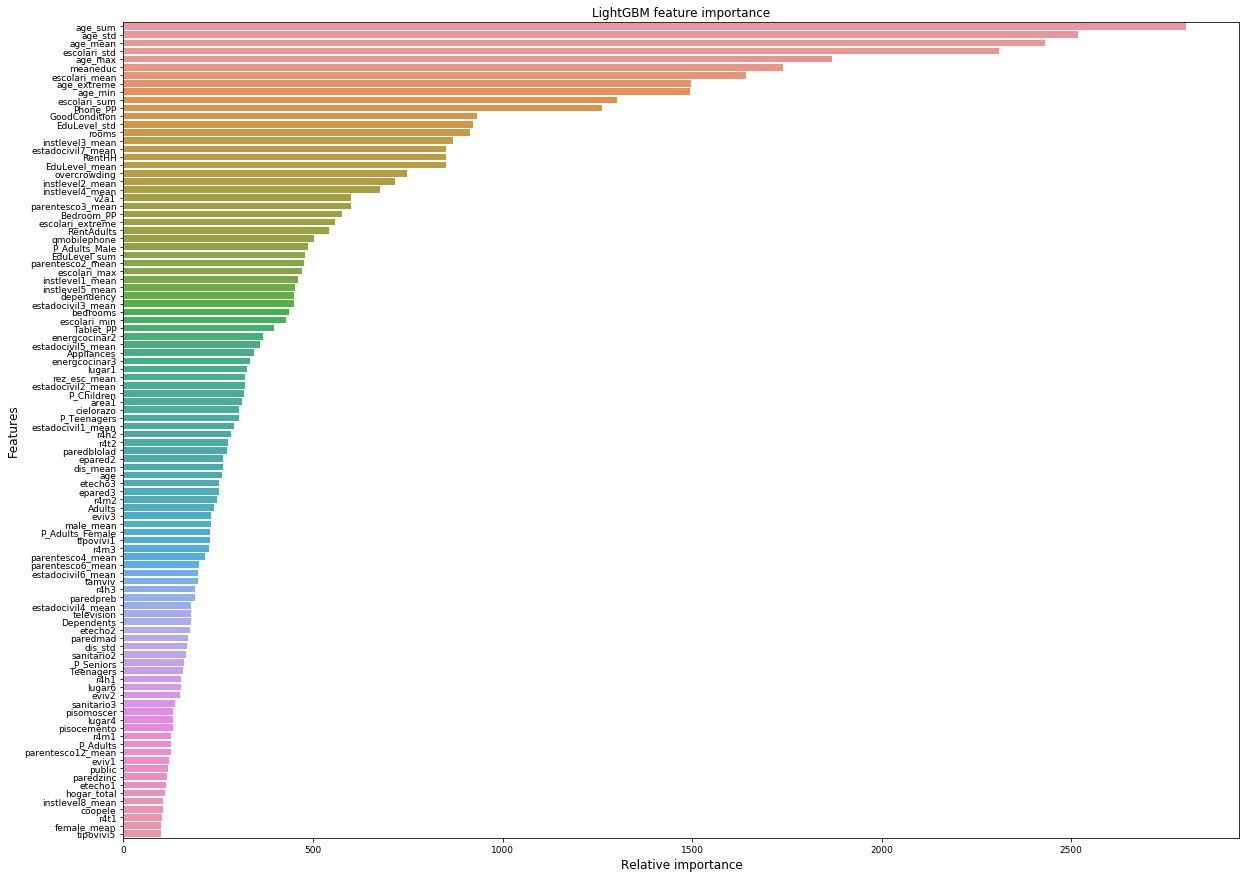

In [111]:
indices = np.argsort(clf.feature_importances_)[::-1]
top_100_indices = indices[:100]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=X.columns[top_100_indices], x = clf.feature_importances_[top_100_indices], orient='h')
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("LightGBM feature importance")

**From the plot above, we understand that the maximum and average age of individuals in a household, overcrowding, years of schooling, average education level and number of tablets own per person are among the most important features on predicting the poverty level of a household.**

# Feature Selection
**We will attempt to re-train the model by selecting the top 100 features based on the previously trained Light GBM model features importance output. The intuition is to remove variables that have very little influence in predicting the Target (poverty level) and give the model more focus on the important variables.**

In [112]:
X2 = X.iloc[:,top_100_indices]
Xtest2 = testML.copy().iloc[:,top_100_indices]


In [113]:
# Re-training on top 100 features
test_predictions = []
for train_index, val_index in kf.split(X2, y):
    print("=======")
    X_train, X_val = X2.iloc[train_index], X2.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    clf.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_metric=evaluate_macroF1_lgb,
            early_stopping_rounds=400, verbose=100)
    test_predictions.append(clf.predict(Xtest2)) # store predictions on test set for Kaggle Submission


Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.45991	valid_0's macroF1: 0.843135
[200]	valid_0's multi_logloss: 0.261273	valid_0's macroF1: 0.916859
[300]	valid_0's multi_logloss: 0.175709	valid_0's macroF1: 0.947184
[400]	valid_0's multi_logloss: 0.137821	valid_0's macroF1: 0.953059
[500]	valid_0's multi_logloss: 0.122568	valid_0's macroF1: 0.958092
[600]	valid_0's multi_logloss: 0.118471	valid_0's macroF1: 0.960193
[700]	valid_0's multi_logloss: 0.124113	valid_0's macroF1: 0.961048
[800]	valid_0's multi_logloss: 0.13177	valid_0's macroF1: 0.959073
[900]	valid_0's multi_logloss: 0.141582	valid_0's macroF1: 0.960336
Early stopping, best iteration is:
[552]	valid_0's multi_logloss: 0.117804	valid_0's macroF1: 0.958966


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.93, importance_type='split', learning_rate=0.1,
        max_depth=8, metric='multi_logloss', min_child_samples=95,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=4, num_leaves=80, objective='multiclass', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.96,
        subsample_for_bin=200000, subsample_freq=0)

C:\Users\jy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.409229	valid_0's macroF1: 0.873266
[200]	valid_0's multi_logloss: 0.226817	valid_0's macroF1: 0.935463
[300]	valid_0's multi_logloss: 0.150638	valid_0's macroF1: 0.953088
[400]	valid_0's multi_logloss: 0.115163	valid_0's macroF1: 0.957946
[500]	valid_0's multi_logloss: 0.102318	valid_0's macroF1: 0.962847
[600]	valid_0's multi_logloss: 0.101967	valid_0's macroF1: 0.962223
[700]	valid_0's multi_logloss: 0.106645	valid_0's macroF1: 0.962223
[800]	valid_0's multi_logloss: 0.113019	valid_0's macroF1: 0.962513
[900]	valid_0's multi_logloss: 0.119989	valid_0's macroF1: 0.962303
Early stopping, best iteration is:
[562]	valid_0's multi_logloss: 0.100866	valid_0's macroF1: 0.961705


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.93, importance_type='split', learning_rate=0.1,
        max_depth=8, metric='multi_logloss', min_child_samples=95,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=4, num_leaves=80, objective='multiclass', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.96,
        subsample_for_bin=200000, subsample_freq=0)

C:\Users\jy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.43653	valid_0's macroF1: 0.868988
[200]	valid_0's multi_logloss: 0.255507	valid_0's macroF1: 0.931458
[300]	valid_0's multi_logloss: 0.167861	valid_0's macroF1: 0.953376
[400]	valid_0's multi_logloss: 0.130353	valid_0's macroF1: 0.95973
[500]	valid_0's multi_logloss: 0.118269	valid_0's macroF1: 0.960423
[600]	valid_0's multi_logloss: 0.119307	valid_0's macroF1: 0.95978
[700]	valid_0's multi_logloss: 0.12605	valid_0's macroF1: 0.961275
[800]	valid_0's multi_logloss: 0.135835	valid_0's macroF1: 0.96065
[900]	valid_0's multi_logloss: 0.146963	valid_0's macroF1: 0.961592
Early stopping, best iteration is:
[558]	valid_0's multi_logloss: 0.11768	valid_0's macroF1: 0.95978


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.93, importance_type='split', learning_rate=0.1,
        max_depth=8, metric='multi_logloss', min_child_samples=95,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=4, num_leaves=80, objective='multiclass', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.96,
        subsample_for_bin=200000, subsample_freq=0)

C:\Users\jy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.406873	valid_0's macroF1: 0.871785
[200]	valid_0's multi_logloss: 0.222465	valid_0's macroF1: 0.936172
[300]	valid_0's multi_logloss: 0.131678	valid_0's macroF1: 0.958946
[400]	valid_0's multi_logloss: 0.0900025	valid_0's macroF1: 0.97113
[500]	valid_0's multi_logloss: 0.0707325	valid_0's macroF1: 0.972255
[600]	valid_0's multi_logloss: 0.0618129	valid_0's macroF1: 0.97354
[700]	valid_0's multi_logloss: 0.0607643	valid_0's macroF1: 0.972202
[800]	valid_0's multi_logloss: 0.0625949	valid_0's macroF1: 0.972371
[900]	valid_0's multi_logloss: 0.0677806	valid_0's macroF1: 0.970194
Early stopping, best iteration is:
[591]	valid_0's multi_logloss: 0.0619891	valid_0's macroF1: 0.974431


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.93, importance_type='split', learning_rate=0.1,
        max_depth=8, metric='multi_logloss', min_child_samples=95,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=4, num_leaves=80, objective='multiclass', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.96,
        subsample_for_bin=200000, subsample_freq=0)

C:\Users\jy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 400 rounds.
[100]	valid_0's multi_logloss: 0.434659	valid_0's macroF1: 0.859215
[200]	valid_0's multi_logloss: 0.252422	valid_0's macroF1: 0.920937
[300]	valid_0's multi_logloss: 0.173499	valid_0's macroF1: 0.943183
[400]	valid_0's multi_logloss: 0.147648	valid_0's macroF1: 0.948055
[500]	valid_0's multi_logloss: 0.139324	valid_0's macroF1: 0.952641
[600]	valid_0's multi_logloss: 0.137978	valid_0's macroF1: 0.954839
[700]	valid_0's multi_logloss: 0.14683	valid_0's macroF1: 0.956011
[800]	valid_0's multi_logloss: 0.157007	valid_0's macroF1: 0.956109
[900]	valid_0's multi_logloss: 0.169922	valid_0's macroF1: 0.956589
Early stopping, best iteration is:
[550]	valid_0's multi_logloss: 0.136513	valid_0's macroF1: 0.95312


LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
        colsample_bytree=0.93, importance_type='split', learning_rate=0.1,
        max_depth=8, metric='multi_logloss', min_child_samples=95,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=5000,
        n_jobs=4, num_leaves=80, objective='multiclass', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.96,
        subsample_for_bin=200000, subsample_freq=0)

C:\Users\jy\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Submission: Prediction on Test Data

**We take the mean of the predictions made by the 5 models we trained earlier using 5-fold Stratified cross validation.**

In [115]:
# Vote on the final target using Mean
submission['Target'] = np.array(test_predictions).mean(axis=0).round().astype(int)
submission['Target'].value_counts()
submission.head()

4    16085
2     3769
3     3017
1      985
Name: Target, dtype: int64

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


**We make another attempt by taking the mode of the predictions made by the 5 models we trained earlier using 5-fold Stratified cross validation.**

In [116]:
submission_mode = submission.copy()

# Vote on the final target using Mode
test_pred_df = pd.DataFrame(test_predictions)
voted_test_predictions = test_pred_df.T.mode(axis = 1).iloc[:,0].values

submission_mode['Target'] = np.array(voted_test_predictions).astype(int)
submission_mode['Target'].value_counts()
submission_mode.head()

4    16637
2     3928
3     2114
1     1177
Name: Target, dtype: int64

,Id,Target
0,ID_2f6873615,4
1,ID_1c78846d2,4
2,ID_e5442cf6a,4
3,ID_a8db26a79,4
4,ID_a62966799,4


**The DataFrame containing the Predictions on the Test Data is saved to a csv for submission in Kaggle.**  
*Competition Leaderboard: <https://www.kaggle.com/c/costa-rican-household-poverty-prediction/leaderboard>*

In [117]:
submission.to_csv('submission_lgb_7.csv',index=False)
submission_mode.to_csv('submission_lgb_8.csv',index=False)



In [ ]:
# Test Result:
